In [27]:
# !pip install randomcolor
# randomcolor.RandomColor().generate()[0]
import randomcolor

# Generate a random color
random_color = randomcolor.RandomColor()
color = random_color.generate()[0]
print(color)

#2992d8


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import seaborn as sns
import randomcolor 

In [2]:
# Study data files
sales_extended_path = "data/car_sales_extended.csv" #the combination of the two pinned .csv files… including model year, make, model, and price. The model year ranges from 1990 to 2020
car_sales_path = "data/car_sales_clean.csv" #just the original csv without null values and an additional, simplified ‘type’ column added to the end

# Read the mouse data and the study results
sales_extended = pd.read_csv(sales_extended_path)
car_sales = pd.read_csv(car_sales_path)


In [3]:
sales_extended

,Year,Make,Model,Price (USD)
0,2015,Kia,Sorento,21500.00
1,2015,Kia,Sorento,21500.00
2,2014,BMW,3 Series,30000.00
3,2015,Volvo,S60,27750.00
4,2014,BMW,6 Series Gran Coupe,67000.00
...,...,...,...,...
482320,2018,BMW,3 Series,31676.02
482321,2011,Hyundai,Sonata,67942.46
482322,2011,Chevrolet,Impala,64342.88
482323,2020,BMW,X3,50060.30


In [4]:
sales_extended.columns

Index(['Year', 'Make', 'Model', 'Price (USD)'], dtype='object')

In [5]:
sales_extended['Model'].unique()

array(['Sorento', '3 Series', 'S60', '6 Series Gran Coupe', 'Altima',
       'M5', 'Cruze', 'A4', 'Camaro', 'A6', 'Optima', 'Fusion', 'Q5',
       '6 Series', 'Impala', '5 Series', 'A3', 'XC70', 'SQ5', 'S5',
       'Suburban', 'ELR', 'V60', 'X6', 'ILX', 'K900', 'Malibu', 'RX 350',
       'Versa', 'Elantra', 'Versa Note', 'A8', 'X1', 'Enclave', 'TTS',
       '4 Series', 'MDX', 'Silverado 1500', 'SRX', 'X5', 'G Coupe',
       'G Sedan', 'FX', 'Santa Fe', 'Genesis', 'Equus', 'Sonata',
       'Sonata Hybrid', 'Accent', 'Veloster', 'Elantra Coupe', 'Azera',
       'Tucson', 'Genesis Coupe', 'Wrangler', 'S-Class', 'GS 350',
       'Outlander', 'C-Class', 'Mazda2', 'Rio', 'M', '370Z', 'Soul',
       'Outlander Sport', 'SLK-Class', 'ES 350', 'E-Class', 'Mazda3',
       'Cooper Clubman', 'Cooper', 'CX-9', 'Forte', 'Compass', 'JX',
       'LR4', 'Mazda5', 'Range Rover Evoque', 'LS 460', 'GLK-Class',
       'Sportage', 'Grand Cherokee', 'MKX', 'XF', 'GL-Class', 'M-Class',
       'Cooper Countryma

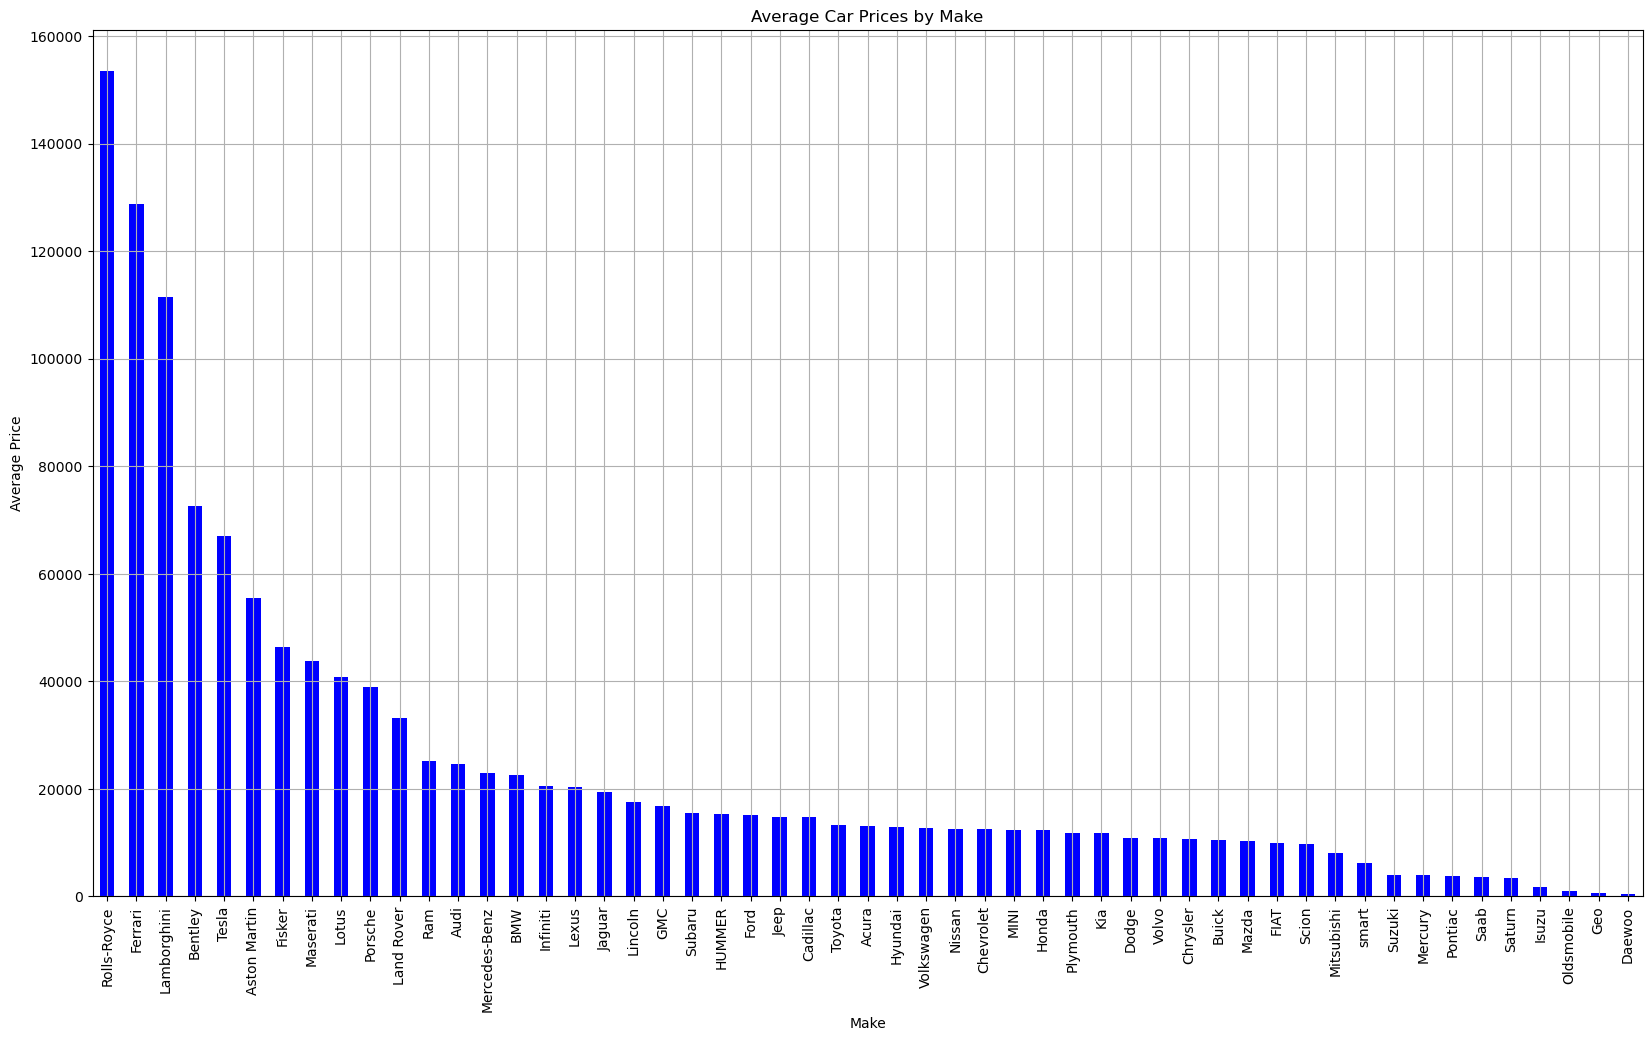

In [6]:
# Calculate average prices by brand

average_prices_by_make = sales_extended.groupby('Make')['Price (USD)'].mean().sort_values(ascending=False)

# Create a bar chart for average car prices by brand

plt.figure(figsize=(20,11.25))

average_prices_by_make.plot(kind='bar', color='blue', alpha=1, align='center')

plt.title('Average Car Prices by Make')
plt.xlabel('Make')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.grid(True)
# plt.tight_layout()

In [8]:
line_data_df = sales_extended[['Year', 'Price (USD)','Make']].copy()
line_data_df = line_data_df.groupby(['Year', 'Make']).mean().reset_index()
line_data_df


,Year,Make,Price (USD)
0,1990,Cadillac,325.000000
1,1990,Chevrolet,6020.000000
2,1990,Honda,357.142857
3,1990,Jaguar,550.000000
4,1990,Lexus,545.000000
...,...,...,...
903,2020,Hyundai,48053.725727
904,2020,Mercedes-Benz,48580.367176
905,2020,Nissan,46306.973452
906,2020,Toyota,49476.110833


In [83]:
#we want to the car makes that have a 1990 year 
line_data_df[line_data_df['Year']==1990]

,Year,Make,Price (USD)
0,1990,Cadillac,325.000000
1,1990,Chevrolet,6020.000000
2,1990,Honda,357.142857
3,1990,Jaguar,550.000000
4,1990,Lexus,545.000000
5,1990,Mazda,1565.000000
6,1990,Mercedes-Benz,275.000000
7,1990,Nissan,200.000000
8,1990,Toyota,400.000000


In [269]:
#we want to gauge what car makes would this consit of 
car_makes = line_data_df[line_data_df['Year']==2014]["Make"].unique().tolist()
car_makes


['Acura',
 'Audi',
 'BMW',
 'Buick',
 'Cadillac',
 'Chevrolet',
 'Chrysler',
 'Dodge',
 'FIAT',
 'Ford',
 'GMC',
 'Honda',
 'Hyundai',
 'Infiniti',
 'Jaguar',
 'Jeep',
 'Kia',
 'Land Rover',
 'Lexus',
 'Lincoln',
 'MINI',
 'Maserati',
 'Mazda',
 'Mercedes-Benz',
 'Mitsubishi',
 'Nissan',
 'Porsche',
 'Ram',
 'Scion',
 'Subaru',
 'Tesla',
 'Toyota',
 'Volkswagen',
 'Volvo',
 'smart']

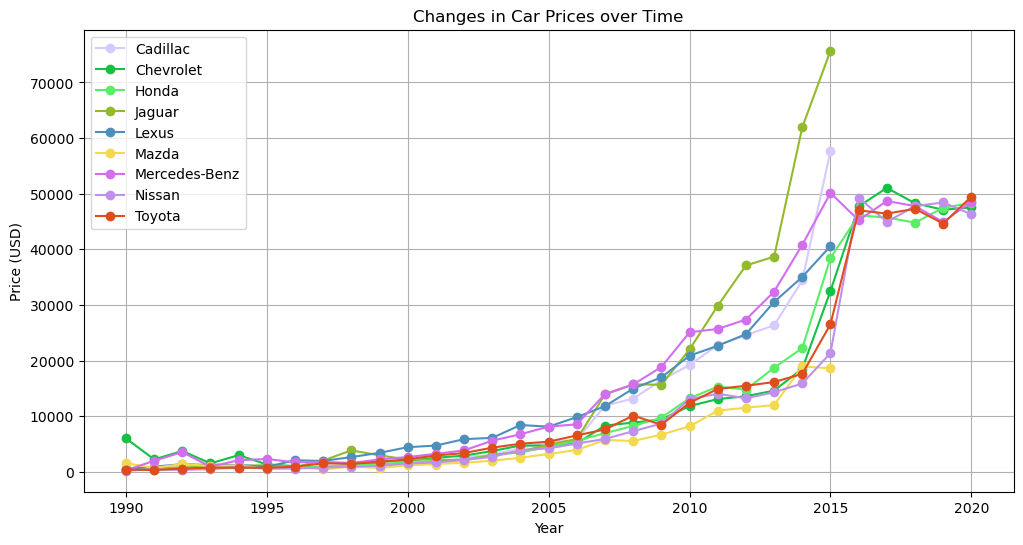

In [37]:
#Line Plot - Changes in Car Prices over Time
plt.figure(figsize=(12, 6)) 
for make in car_makes: 
    temp_df = line_data_df[line_data_df['Make']==make] 
    color = randomcolor.RandomColor().generate()[0] 
    plt.plot(temp_df['Year'], temp_df['Price (USD)'], marker='o', color=color, label=make) 
plt.title('Changes in Car Prices over Time')
plt.xlabel('Year') 
plt.ylabel('Price (USD)') 
plt.legend()
plt.grid(True) 
plt.show()

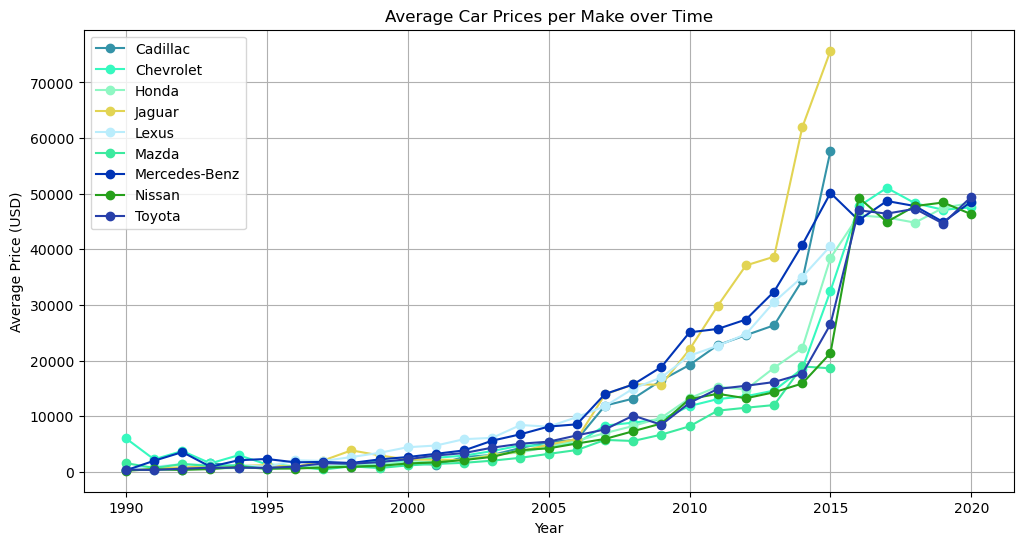

In [39]:
# Calculate average price per make
average_prices = line_data_df.groupby('Make')['Price (USD)'].mean()

# Plot average prices for each make over time
plt.figure(figsize=(12, 6))
for make in car_makes:
    color = randomcolor.RandomColor().generate()[0]
    plt.plot(line_data_df[line_data_df['Make']==make]['Year'], 
             line_data_df[line_data_df['Make']==make]['Price (USD)'], 
             marker='o', color=color, label=make)

plt.title('Average Car Prices per Make over Time')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
# Initialize variables to store maximum price increase per make
max_price_increase_per_make = {}

for make in car_makes:
    # Calculate price change over time for the current make
    line_data_df_make = line_data_df[line_data_df['Make'] == make].copy()
    line_data_df_make['Price Change'] = line_data_df_make['Price (USD)'].diff()
    
    # Find the maximum price increase for the current make
    max_increase = line_data_df_make['Price Change'].max()
    
    # Store the maximum price increase for the current make
    max_price_increase_per_make[make] = max_increase

# Print the maximum price increase for each make
for make, max_increase in max_price_increase_per_make.items():
    print(f"The maximum price increase for {make} is: {max_increase}")

The maximum price increase for Cadillac is: 23278.238839882382
The maximum price increase for Chevrolet is: 15196.976178148776
The maximum price increase for Honda is: 16204.276349464864
The maximum price increase for Jaguar is: 23263.26171987345
The maximum price increase for Lexus is: 5774.195675861676
The maximum price increase for Mazda is: 6935.163981302008
The maximum price increase for Mercedes-Benz is: 9318.834397946659
The maximum price increase for Nissan is: 27960.76320760331
The maximum price increase for Toyota is: 20485.7086798851


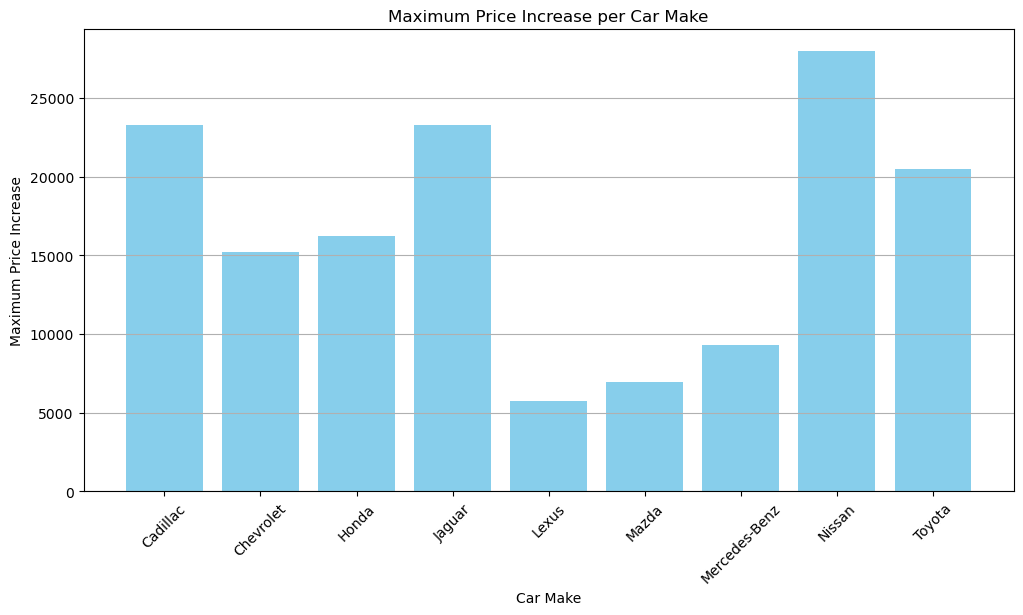

The maximum price increase for Cadillac is: 23278.238839882382
The maximum price increase for Chevrolet is: 15196.976178148776
The maximum price increase for Honda is: 16204.276349464864
The maximum price increase for Jaguar is: 23263.26171987345
The maximum price increase for Lexus is: 5774.195675861676
The maximum price increase for Mazda is: 6935.163981302008
The maximum price increase for Mercedes-Benz is: 9318.834397946659
The maximum price increase for Nissan is: 27960.76320760331
The maximum price increase for Toyota is: 20485.7086798851


In [41]:

# Initialize variables to store maximum price increase per make
max_price_increase_per_make = {}

for make in car_makes:
    # Calculate price change over time for the current make
    line_data_df_make = line_data_df[line_data_df['Make'] == make].copy()
    line_data_df_make['Price Change'] = line_data_df_make['Price (USD)'].diff()
    
    # Find the maximum price increase for the current make
    max_increase = line_data_df_make['Price Change'].max()
    
    # Store the maximum price increase for the current make
    max_price_increase_per_make[make] = max_increase

# Plot the maximum price increase for each make
plt.figure(figsize=(12, 6))
plt.bar(max_price_increase_per_make.keys(), max_price_increase_per_make.values(), color='skyblue')
plt.title('Maximum Price Increase per Car Make')
plt.xlabel('Car Make')
plt.ylabel('Maximum Price Increase')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
# Print the maximum price increase for each make
for make, max_increase in max_price_increase_per_make.items():
    print(f"The maximum price increase for {make} is: {max_increase}")

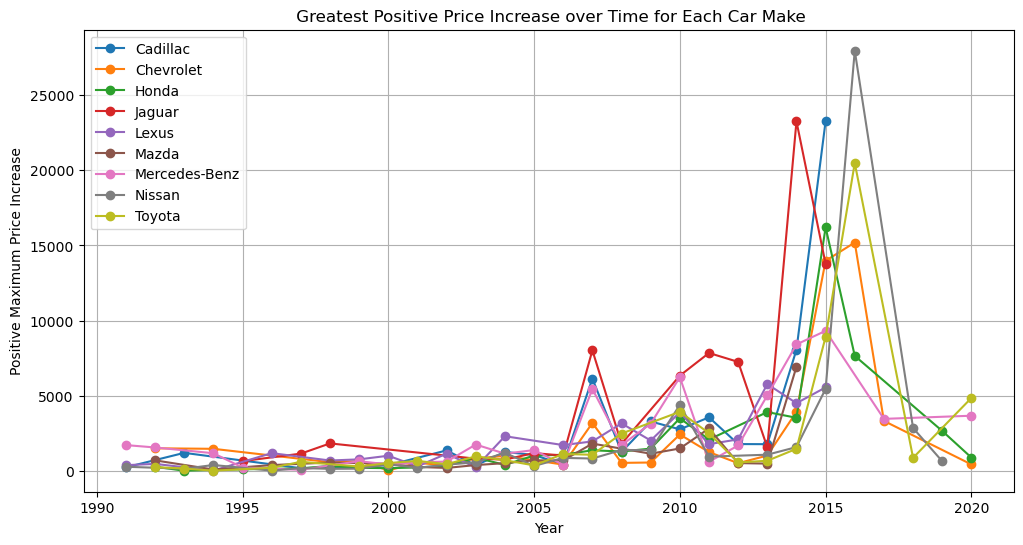

In [42]:
# Initialize variables to store positive maximum price increase per make over time
positive_max_price_increase_per_make_over_time = {}

for make in car_makes:
    # Calculate price change over time for the current make
    line_data_df_make = line_data_df[line_data_df['Make'] == make].copy()  # Create a copy of the DataFrame
    line_data_df_make['Price Change'] = line_data_df_make['Price (USD)'].diff()
    
    # Find the positive maximum price increase for each year for the current make
    max_increase_per_year = line_data_df_make.groupby('Year')['Price Change'].max()
    positive_max_increase_per_year = max_increase_per_year[max_increase_per_year > 0]  # Consider only positive values
    
    # Store the positive maximum price increase for each year for the current make
    positive_max_price_increase_per_make_over_time[make] = positive_max_increase_per_year

# Plot the changes in positive maximum price increase over time for each make
plt.figure(figsize=(12, 6))
for make, positive_max_increase_per_year in positive_max_price_increase_per_make_over_time.items():
    plt.plot(positive_max_increase_per_year.index, positive_max_increase_per_year.values, marker='o', label=make)

plt.title(' Greatest Positive Price Increase over Time for Each Car Make')
plt.xlabel('Year')
plt.ylabel('Positive Maximum Price Increase')
plt.legend()
plt.grid(True)
plt.show()

#we want to gauge what car makes would this consit of 
car_makes_2 = line_data_df[line_data_df["Year"]==2010]['Make'].unique().tolist()
car_makes_2

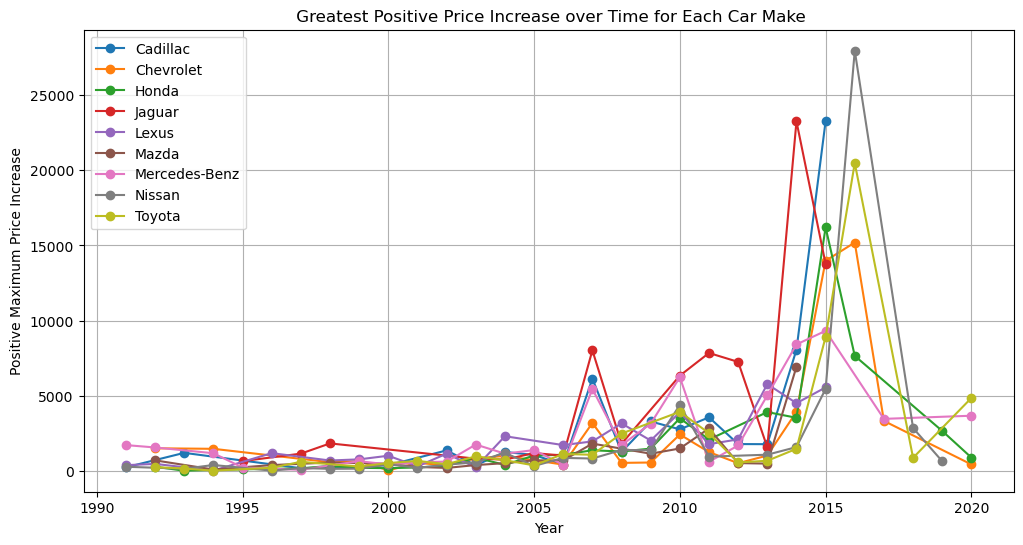

In [43]:
# Initialize variables to store positive maximum price increase per make over time
positive_max_price_increase_per_make_over_time = {}

for make in car_makes:
    # Calculate price change over time for the current make
    line_data_df_make = line_data_df[line_data_df['Make'] == make].copy()  # Create a copy of the DataFrame
    line_data_df_make['Price Change'] = line_data_df_make['Price (USD)'].diff()
    
    # Find the positive maximum price increase for each year for the current make
    max_increase_per_year = line_data_df_make.groupby('Year')['Price Change'].max()
    positive_max_increase_per_year = max_increase_per_year[max_increase_per_year > 0]  # Consider only positive values
    
    # Store the positive maximum price increase for each year for the current make
    positive_max_price_increase_per_make_over_time[make] = positive_max_increase_per_year

# Plot the changes in positive maximum price increase over time for each make
plt.figure(figsize=(12, 6))
for make, positive_max_increase_per_year in positive_max_price_increase_per_make_over_time.items():
    plt.plot(positive_max_increase_per_year.index, positive_max_increase_per_year.values, marker='o', label=make)

plt.title(' Greatest Positive Price Increase over Time for Each Car Make')
plt.xlabel('Year')
plt.ylabel('Positive Maximum Price Increase')
plt.legend()
plt.grid(True)
plt.show()

In [191]:
car_sales

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,type,month,month_year
0,2014,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 04:30:00+00:00,SUV,12,December 2014
1,2014,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 04:30:00+00:00,SUV,12,December 2014
2,2015,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-14 20:30:00+00:00,Sedan,1,January 2015
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-28 20:30:00+00:00,Sedan,1,January 2015
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18 04:30:00+00:00,Sedan,12,December 2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472320,2015,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,2015-07-06 23:15:00+00:00,Sedan,7,July 2015
472321,2015,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,2015-07-08 02:30:00+00:00,Truck,7,July 2015
472322,2015,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,2015-07-08 02:30:00+00:00,SUV,7,July 2015
472323,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,2015-07-08 23:45:00+00:00,Sedan,7,July 2015


In [192]:
car_sales.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate', 'type', 'month', 'month_year'],
      dtype='object')

In [193]:
car_sales['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Cadillac', 'Acura', 'Lexus', 'Hyundai', 'Buick', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'Jaguar', 'Volkswagen', 'Toyota',
       'Subaru', 'Scion', 'Porsche', 'Dodge', 'FIAT', 'Chrysler',
       'Ferrari', 'Honda', 'GMC', 'Ram', 'smart', 'Bentley', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'HUMMER', 'Saab', 'Suzuki',
       'Oldsmobile', 'Rolls-Royce', 'Isuzu', 'Plymouth', 'Tesla',
       'Aston Martin', 'Geo', 'Fisker', 'Daewoo', 'Lamborghini', 'Lotus'],
      dtype=object)

In [237]:
sales_data = car_sales.groupby(['saledate', 'model']).size().reset_index(name='num_cars_sold')
sales_data

,saledate,model,num_cars_sold
0,2014-01-01 01:15:00+00:00,300,1
1,2014-01-01 01:15:00+00:00,ATS,1
2,2014-01-01 01:15:00+00:00,Accent,1
3,2014-01-01 01:15:00+00:00,Accord,1
4,2014-01-01 01:15:00+00:00,Altima,1
...,...,...,...
142663,2015-07-13 23:30:00+00:00,F-150,2
142664,2015-07-13 23:30:00+00:00,Malibu,1
142665,2015-07-13 23:30:00+00:00,Silverado 2500HD,1
142666,2015-07-13 23:30:00+00:00,Tundra,2


In [238]:
print(sales_data.columns)

Index(['saledate', 'model', 'num_cars_sold'], dtype='object')


In [239]:
# Convert 'saledate' to date format (without time)
sales_data['saledate'] = sales_data['saledate'].dt.date

# Display the updated DataFrame
print(sales_data)

          saledate             model  num_cars_sold
0       2014-01-01               300              1
1       2014-01-01               ATS              1
2       2014-01-01            Accent              1
3       2014-01-01            Accord              1
4       2014-01-01            Altima              1
...            ...               ...            ...
142663  2015-07-13             F-150              2
142664  2015-07-13            Malibu              1
142665  2015-07-13  Silverado 2500HD              1
142666  2015-07-13            Tundra              2
142667  2015-07-20             Tahoe              1

[142668 rows x 3 columns]


In [240]:

sale_dates = sales_data['saledate'].unique()
print(sale_dates)

[datetime.date(2014, 1, 1) datetime.date(2014, 1, 2)
 datetime.date(2014, 1, 5) datetime.date(2014, 1, 6)
 datetime.date(2014, 1, 7) datetime.date(2014, 1, 8)
 datetime.date(2014, 1, 12) datetime.date(2014, 1, 13)
 datetime.date(2014, 1, 14) datetime.date(2014, 1, 15)
 datetime.date(2014, 1, 28) datetime.date(2014, 2, 14)
 datetime.date(2014, 12, 16) datetime.date(2014, 12, 17)
 datetime.date(2014, 12, 18) datetime.date(2014, 12, 19)
 datetime.date(2014, 12, 21) datetime.date(2014, 12, 22)
 datetime.date(2014, 12, 23) datetime.date(2014, 12, 24)
 datetime.date(2014, 12, 26) datetime.date(2014, 12, 28)
 datetime.date(2014, 12, 29) datetime.date(2014, 12, 30)
 datetime.date(2014, 12, 31) datetime.date(2015, 1, 1)
 datetime.date(2015, 1, 2) datetime.date(2015, 1, 4)
 datetime.date(2015, 1, 5) datetime.date(2015, 1, 6)
 datetime.date(2015, 1, 7) datetime.date(2015, 1, 8)
 datetime.date(2015, 1, 9) datetime.date(2015, 1, 11)
 datetime.date(2015, 1, 12) datetime.date(2015, 1, 13)
 datetime.d

In [241]:
sales_data['saledate'] = sales_data['saledate'].astype(str)


In [242]:
sale_dates = sales_data['saledate'].unique()
print(sale_dates)

['2014-01-01' '2014-01-02' '2014-01-05' '2014-01-06' '2014-01-07'
 '2014-01-08' '2014-01-12' '2014-01-13' '2014-01-14' '2014-01-15'
 '2014-01-28' '2014-02-14' '2014-12-16' '2014-12-17' '2014-12-18'
 '2014-12-19' '2014-12-21' '2014-12-22' '2014-12-23' '2014-12-24'
 '2014-12-26' '2014-12-28' '2014-12-29' '2014-12-30' '2014-12-31'
 '2015-01-01' '2015-01-02' '2015-01-04' '2015-01-05' '2015-01-06'
 '2015-01-07' '2015-01-08' '2015-01-09' '2015-01-11' '2015-01-12'
 '2015-01-13' '2015-01-14' '2015-01-15' '2015-01-16' '2015-01-18'
 '2015-01-19' '2015-01-20' '2015-01-21' '2015-01-22' '2015-01-25'
 '2015-01-26' '2015-01-27' '2015-01-28' '2015-01-29' '2015-02-01'
 '2015-02-02' '2015-02-03' '2015-02-04' '2015-02-05' '2015-02-06'
 '2015-02-08' '2015-02-09' '2015-02-10' '2015-02-11' '2015-02-12'
 '2015-02-15' '2015-02-16' '2015-02-17' '2015-02-18' '2015-02-19'
 '2015-02-20' '2015-02-22' '2015-02-23' '2015-02-24' '2015-02-25'
 '2015-02-26' '2015-03-01' '2015-03-02' '2015-03-03' '2015-03-04'
 '2015-03-

In [243]:

# Convert the date strings to datetime format
sales_data['saledate'] = pd.to_datetime(sales_data['saledate'])

# Convert the datetime format back to a string with a specific format
sales_data['saledate_formatted'] = sales_data['saledate'].dt.strftime('%b %Y')

# Display the updated DataFrame with the formatted date
print(sales_data['saledate_formatted'].unique())

['Jan 2014' 'Feb 2014' 'Dec 2014' 'Jan 2015' 'Feb 2015' 'Mar 2015'
 'Apr 2015' 'May 2015' 'Jun 2015' 'Jul 2015']


In [244]:
print(sales_data)

         saledate             model  num_cars_sold saledate_formatted
0      2014-01-01               300              1           Jan 2014
1      2014-01-01               ATS              1           Jan 2014
2      2014-01-01            Accent              1           Jan 2014
3      2014-01-01            Accord              1           Jan 2014
4      2014-01-01            Altima              1           Jan 2014
...           ...               ...            ...                ...
142663 2015-07-13             F-150              2           Jul 2015
142664 2015-07-13            Malibu              1           Jul 2015
142665 2015-07-13  Silverado 2500HD              1           Jul 2015
142666 2015-07-13            Tundra              2           Jul 2015
142667 2015-07-20             Tahoe              1           Jul 2015

[142668 rows x 4 columns]


In [245]:

#Filter the DataFrame based on the specified date range
filtered_sales_date = sales_data[
    (sales_data['saledate_formatted'] == 'Dec 2014') |
    (sales_data['saledate_formatted'] == 'Jan 2015') |
    (sales_data['saledate_formatted'] == 'Feb 2015') |
    (sales_data['saledate_formatted'] == 'Mar 2015') |
    (sales_data['saledate_formatted'] == 'Apr 2015') |
    (sales_data['saledate_formatted'] == 'May 2015') |
    (sales_data['saledate_formatted'] == 'Jun 2015') |
    (sales_data['saledate_formatted'] == 'Jul 2015')
]

# Display the filtered DataFrame
print(filtered_sales_date)


         saledate             model  num_cars_sold saledate_formatted
136    2014-12-16          3 Series              1           Dec 2014
137    2014-12-16               300              1           Dec 2014
138    2014-12-16               500              1           Dec 2014
139    2014-12-16          7 Series              1           Dec 2014
140    2014-12-16                A4              2           Dec 2014
...           ...               ...            ...                ...
142663 2015-07-13             F-150              2           Jul 2015
142664 2015-07-13            Malibu              1           Jul 2015
142665 2015-07-13  Silverado 2500HD              1           Jul 2015
142666 2015-07-13            Tundra              2           Jul 2015
142667 2015-07-20             Tahoe              1           Jul 2015

[142532 rows x 4 columns]


In [246]:
print(filtered_sales_date['saledate_formatted'].unique())

['Dec 2014' 'Jan 2015' 'Feb 2015' 'Mar 2015' 'Apr 2015' 'May 2015'
 'Jun 2015' 'Jul 2015']


In [248]:
print(filtered_sales_date['model'].unique())

['3 Series' '300' '500' '7 Series' 'A4' 'Accent' 'Accord' 'Altima'
 'Armada' 'Avalon' 'Azera' 'C-Class' 'C-Max Energi' 'CC' 'CR-V' 'Cadenza'
 'Camaro' 'Camry' 'Camry Hybrid' 'Captiva Sport' 'Cayenne' 'Challenger'
 'Charger' 'Civic' 'Cooper Countryman' 'Corolla' 'Cruze' 'DeVille'
 'E-Class' 'E-Series Van' 'Elantra' 'Elantra Coupe' 'Elantra GT'
 'Envoy XL' 'Equinox' 'Equus' 'Escape' 'Expedition' 'Express Cargo'
 'F-150' 'F-250 Super Duty' 'F-350 Super Duty' 'FX35' 'Fiesta'
 'Five Hundred' 'Flex' 'Forte' 'Fusion' 'Fusion Hybrid' 'G Sedan' 'GLI'
 'GTI' 'Genesis' 'Genesis Coupe' 'Grand Caravan' 'Grand Cherokee'
 'Grand Prix' 'Highlander Hybrid' 'I30' 'IS 250' 'Impala' 'Impreza'
 'Insight' 'Jetta' 'Journey' 'Legacy' 'Liberty' 'MDX' 'Malibu' 'Maxima'
 'Mustang' 'Navigator' 'New Beetle' 'Optima' 'Outback' 'Pacifica'
 'Park Avenue' 'Passat' 'Patriot' 'Prius' 'Prius v' 'RAV4' 'Raider'
 'Range Rover' 'Ranger' 'Rio' 'S6' 'S90' 'Santa Fe' 'Santa Fe Sport'
 'Sebring' 'Sentra' 'Sierra 1500' 'Silverad

In [251]:
top_sales = filtered_sales_date.loc[(filtered_sales_date["model"]=="Altima") | (filtered_sales_date["model"]== "Camry") | (filtered_sales_date["model"]=="Accord") | (filtered_sales_date["model"]=="Civic") | (filtered_sales_date["model"]=="F-150"),:]
top_sales

,saledate,model,num_cars_sold,saledate_formatted
142,2014-12-16,Accord,1,Dec 2014
143,2014-12-16,Altima,5,Dec 2014
153,2014-12-16,Camry,3,Dec 2014
159,2014-12-16,Civic,2,Dec 2014
175,2014-12-16,F-150,3,Dec 2014
...,...,...,...,...
142585,2015-07-09,Camry,2,Jul 2015
142590,2015-07-09,F-150,1,Jul 2015
142609,2015-07-09,Accord,1,Jul 2015
142642,2015-07-09,F-150,1,Jul 2015


In [267]:

# Group the data by 'saledate_formatted', 'model', and sum the 'num_cars_sold' for each model in each month
monthly_model_sales = top_sales.groupby(['saledate_formatted', 'model'])['num_cars_sold'].sum().unstack()
monthly_model_sales

model,Accord,Altima,Camry,Civic,F-150
saledate_formatted,,,,,
Apr 2015,25,50,30,16,29
Dec 2014,916,1256,1025,721,707
Feb 2015,2459,5348,2983,2130,3725
Jan 2015,2515,4120,2634,2089,3063
Jul 2015,14,21,10,10,36
Jun 2015,1337,2651,2362,1027,2078
Mar 2015,546,1600,892,496,1086
May 2015,712,1297,1047,579,1216


Accord:
Best Month: February 2015 with 2,459 units sold.
Worst Month: July 2015, where sales dropped to just 14 units.
Trend: The Accord saw a significant spike in February but experienced a steep drop by April. Sales picked up again in June but fell off once more in July. This suggests that sales can vary widely, possibly due to seasonal factors or changes in marketing.

Altima:
Best Month: February 2015, with a high of 5,348 units sold.
Worst Month: July 2015, with just 21 units sold.
Trend: The Altima also peaked in February and saw a big dip by July. Sales were consistently strong except for July, indicating that the model was quite popular for most of the period.

Camry:
Best Month: February 2015, with 2,983 units sold.
Worst Month: July 2015, with only 10 units sold.
Trend: Similar to the other models, the Camry’s sales peaked in February and dropped significantly by July. The Camry generally had high sales, although it experienced some fluctuations.

Civic:
Best Month: January 2015, with 2,089 units sold.
Worst Month: April 2015, with just 16 units sold.
Trend: The Civic saw its highest sales in January and its lowest in April. There was a noticeable recovery in sales in the following months, suggesting that it could be influenced by seasonal trends or market adjustments.

F-150:
Best Month: February 2015, with 3,725 units sold.
Worst Month: April 2015, with only 29 units sold.
Trend: The F-150’s sales also peaked in February but fell sharply by April. The model had strong sales early in the year but declined significantly in the middle of the year.

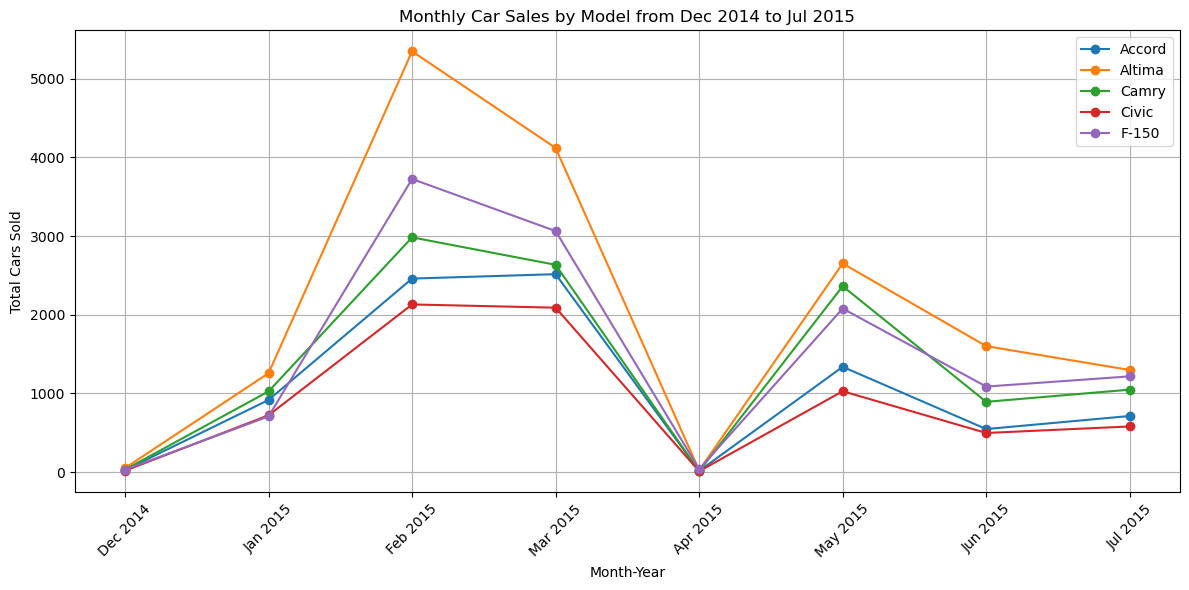

In [260]:

plt.figure(figsize=(12, 6))

# Plot a line graph for each model
for model in monthly_model_sales.columns:
    plt.plot(monthly_model_sales.index, monthly_model_sales[model], marker='o', label=model)

# Customize x-axis labels
custom_labels = ['Dec 2014', 'Jan 2015', 'Feb 2015', 'Mar 2015', 'Apr 2015', 'May 2015', 'Jun 2015', 'Jul 2015']
plt.xticks(monthly_model_sales.index, custom_labels, rotation=45)

plt.xlabel('Month-Year')
plt.ylabel('Total Cars Sold')
plt.title('Monthly Car Sales by Model from Dec 2014 to Jul 2015')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

Key Takeaways
Peak Performance: February was a standout month for all models, likely due to seasonal promotions or market dynamics.
Summer Slump: Sales generally dropped in July across all models, which could point to a summer slowdown or reduced promotional activity.
Sales Variability: There’s a lot of fluctuation in sales, suggesting that various factors such as promotions, new model releases, or market conditions can significantly impact sales performance.
Overall, these trends highlight how car sales can vary over time and suggest that external factors might play a big role in these fluctuations.